In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import calendar as cal

from sklearn.preprocessing import LabelEncoder

In [3]:
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)

In [4]:
print(df_train.shape)
print(df_train_label.shape)
print(df_test.shape)
print(df_test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


In [5]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
dtype: int64

In [6]:
trainDF = df_train.join(df_train_label)
testDF = df_test.join(df_train_label)

In [7]:
trainDF = trainDF.rename(columns={0:"Bookings"})
testDF = testDF.rename(columns={0:"Bookings"})

In [8]:
trainDF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [9]:
trainDF.shape

(8708, 10)

## Missing Value Analysis

In [10]:
trainDF.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

There is no missing value in training set

In [11]:
test = df_test.nunique()
test

datetime      2178
season           4
holiday          2
workingday       2
weather          3
temp            44
atemp           54
humidity        80
windspeed       24
dtype: int64

In [12]:
catColumns = []
for k, v in enumerate(test):
    if(v < 20):
        catColumns.append(trainDF.columns[k])
catColumns

['season', 'holiday', 'workingday', 'weather']

<Figure size 432x288 with 0 Axes>

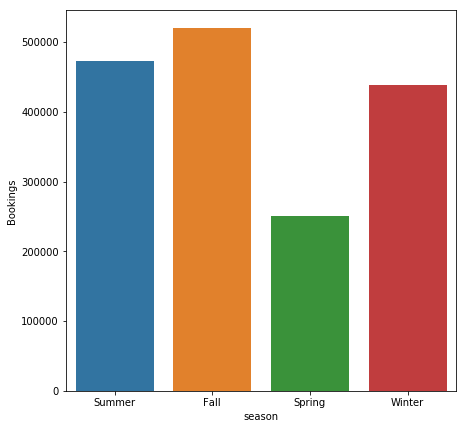

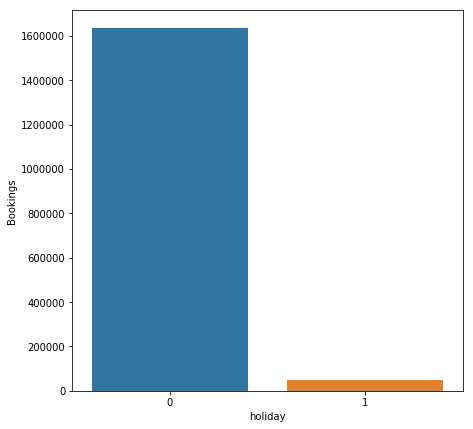

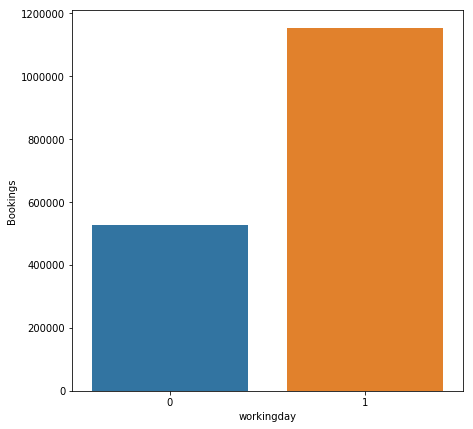

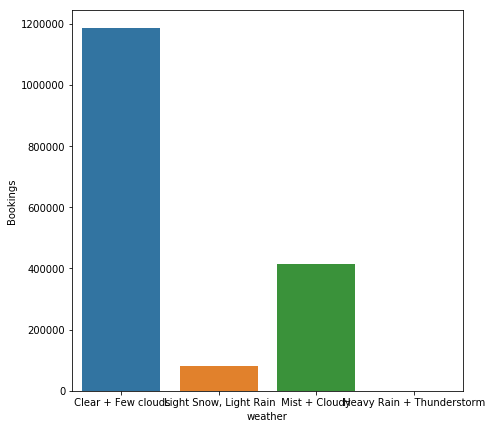

In [13]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    #fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(7,7))
    sns.barplot(x=trainDF[item], y='Bookings', data=trainDF, estimator=sum, ci=None)
    #sns.catplot(x=item, y='Bookings', data=trainDF, jitter='0.45')

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

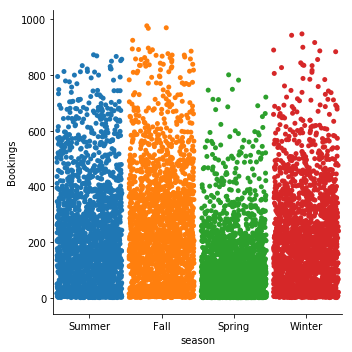

<Figure size 864x864 with 0 Axes>

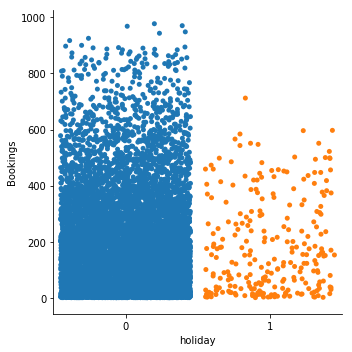

<Figure size 864x864 with 0 Axes>

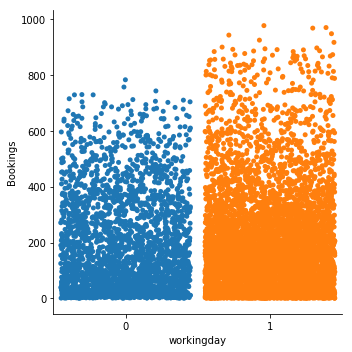

<Figure size 864x864 with 0 Axes>

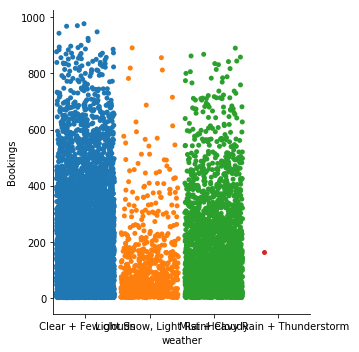

In [14]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    #fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(12,12))
    #sns.barplot(x=trainDF[item], y='Bookings', data=trainDF, estimator=sum, ci=None)
    sns.catplot(x=item, y='Bookings', data=trainDF, jitter='0.45')


# Outlier Analysis

In [15]:
trainDF.Bookings.describe()

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Bookings, dtype: float64

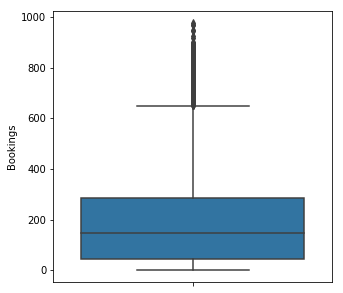

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(y=trainDF.Bookings)

In [17]:
stdDf = np.std(trainDF.Bookings)
varDf = np.var(trainDF.Bookings)
meanDf = np.mean(trainDF.Bookings)
print('StdD: ', stdDf, '\nVar: ', varDf, '\nmeanDf: ', meanDf)

StdD:  181.54178620709257 
Var:  32957.42013926171 
meanDf:  193.00700505282498


In [18]:
upperRange = meanDf + 3*stdDf
lowerRange = meanDf - 3*stdDf
print('Range of values should be: ', lowerRange, ' to ', upperRange)
print('Actual Range of values should be: ', 0, ' to ', int(np.round(upperRange,0)))

Range of values should be:  -351.6183535684527  to  737.6323636741026
Actual Range of values should be:  0  to  738


In [19]:
trainDF = trainDF[trainDF.Bookings < int(np.round(upperRange,0))]
trainDF.shape

(8591, 10)

# Feature Engineering

In [20]:
print(trainDF.shape)
print(testDF.shape)

(8591, 10)
(2178, 10)


In [21]:
merged = pd.concat([trainDF, testDF])
merged.shape

(10769, 10)

In [22]:
merged.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [23]:
merged['date'] = merged.datetime.apply(lambda x : x.split()[0])
merged['hour'] = merged.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [24]:
merged['month'] = merged.date.apply(lambda x : cal.month_name[dt.datetime.strptime(x, '%m/%d/%Y').month])
merged['weekday'] = merged.date.apply(lambda x : cal.day_name[dt.datetime.strptime(x, '%m/%d/%Y').weekday()])

In [25]:
nuniques = merged.nunique()
nuniques

datetime      10769
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
Bookings        734
date            456
hour             24
month            12
weekday           7
dtype: int64

In [26]:
catColumns = []
for k, v in enumerate(nuniques):
    if(v < 10):
        catColumns.append(merged.columns[k])
        #merged[trainDF.columns[k]] = merged[trainDF.columns[k]].astype('category')
catColumns

['season', 'holiday', 'workingday', 'weather', 'weekday']

In [27]:
for item in catColumns:
    merged[item] = merged[item].astype('category')

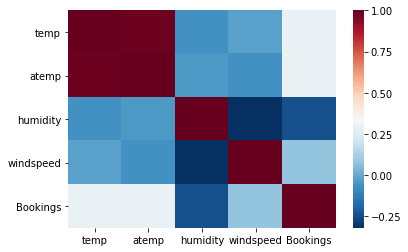

In [28]:
#plt.figure(figsize=(5,5))
sns.heatmap(merged.corr(), cmap='RdBu_r')

Since temp and atemp are highly correlated so we can drop either of the columns from our data

In [29]:
merged_drop=merged.drop(columns={'temp','datetime'})
merged_drop.shape

(10769, 12)

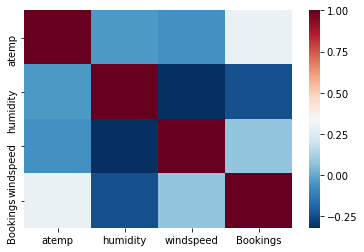

In [30]:
sns.heatmap(merged_drop.corr(),cmap='RdBu_r')

## Let's do the label encoding for the categorical columns

In [31]:
merged_drop.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,Bookings,date,hour,month,weekday
0,Summer,0,1,Clear + Few clouds,25.760,77,16.9979,504,5/2/2012,19,May,Wednesday
1,Fall,0,1,Clear + Few clouds,33.335,79,19.0012,5,9/5/2012,4,September,Wednesday
2,Spring,0,1,Clear + Few clouds,6.060,50,22.0028,139,1/13/2011,9,January,Thursday
3,Winter,0,1,Clear + Few clouds,16.665,29,8.9981,209,11/18/2011,16,November,Friday
4,Fall,0,1,Clear + Few clouds,33.335,51,19.0012,184,9/13/2011,13,September,Tuesday


In [32]:
#labelEnc = LabelEncoder()

In [33]:
#merged_Dummy = merged_drop.apply(labelEnc.fit_transform)

In [34]:
#merged_Dummy.head()

In [35]:
#sns.heatmap(merged_drop_Encoded.corr(), cmap='RdBu_r')

Since date and datetime are highly correlated so it would be better to drop either of the column

In [36]:
#merged_drop=merged_drop_Encoded.drop(columns='datetime')
merged_drop.shape

(10769, 12)

In [37]:
merged_drop.nunique()

season          4
holiday         2
workingday      2
weather         4
atemp          60
humidity       89
windspeed      28
Bookings      734
date          456
hour           24
month          12
weekday         7
dtype: int64

In [38]:
merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 2177
Data columns (total 12 columns):
season        10769 non-null category
holiday       10769 non-null category
workingday    10769 non-null category
weather       10769 non-null category
atemp         10769 non-null float64
humidity      10769 non-null int64
windspeed     10769 non-null float64
Bookings      10769 non-null int64
date          10769 non-null object
hour          10769 non-null object
month         10769 non-null object
weekday       10769 non-null category
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 726.6+ KB


In [39]:
#merged_drop.datetime = merged_drop.datetime.astype('datetime64')
#merged_drop.date = merged_drop.date.astype('datetime64')
#merged_drop.hour = merged_drop.hour.astype('datetime64')
#merged_drop.month = merged_drop.month.astype('datetime64')

In [40]:
merged_Dummy = pd.get_dummies(data=merged_drop, columns=['season', 'holiday', 'workingday', 'weather', 'weekday', 'month'], drop_first=True)
print(merged_Dummy.shape)
merged_Dummy.head()
#merged_drop.shape
#,'holiday','workingday','weather'

(10769, 31)


,atemp,humidity,windspeed,Bookings,date,hour,season_Spring,season_Summer,season_Winter,holiday_1,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,25.760,77,16.9979,504,5/2/2012,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,33.335,79,19.0012,5,9/5/2012,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6.060,50,22.0028,139,1/13/2011,9,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,16.665,29,8.9981,209,11/18/2011,16,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,33.335,51,19.0012,184,9/13/2011,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
merged_Dummy.columns

Index(['atemp', 'humidity', 'windspeed', 'Bookings', 'date', 'hour',
       'season_Spring', 'season_Summer', 'season_Winter', 'holiday_1',
       'workingday_1', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [42]:
#merged_Dummy[merged_Dummy.holiday_1 == 1].shape
#merged_Dummy[merged_Dummy['weather_ Heavy Rain + Thunderstorm '] == 1].shape

Linear Regression does not work on date/datetime type so modifying it.

In [43]:
merged_Dummy.date = pd.to_datetime(merged_Dummy.date)
merged_Dummy.date = merged_Dummy.date.map(dt.datetime.toordinal)
merged_Dummy.hour = merged_Dummy.hour.astype('int64')
merged_Dummy1 = merged_Dummy
merged_Dummy = merged_Dummy.drop(columns='date')

In [44]:
#labelEnc = LabelEncoder()

In [45]:
test_df_modulated = merged_Dummy[8591:]

In [46]:
train_df_modulated = merged_Dummy[:8591]

In [47]:
print(train_df_modulated.shape)
print(test_df_modulated.shape)

(8591, 30)
(2178, 30)


In [48]:
train_df_modulated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8591 entries, 0 to 8707
Data columns (total 30 columns):
atemp                                  8591 non-null float64
humidity                               8591 non-null int64
windspeed                              8591 non-null float64
Bookings                               8591 non-null int64
hour                                   8591 non-null int64
season_Spring                          8591 non-null uint8
season_Summer                          8591 non-null uint8
season_Winter                          8591 non-null uint8
holiday_1                              8591 non-null uint8
workingday_1                           8591 non-null uint8
weather_ Heavy Rain + Thunderstorm     8591 non-null uint8
weather_ Light Snow, Light Rain        8591 non-null uint8
weather_ Mist + Cloudy                 8591 non-null uint8
weekday_Monday                         8591 non-null uint8
weekday_Saturday                       8591 non-null uint8
week

In [483]:
'''train_df_modulated = train_df_modulated[train_df_modulated.holiday_1 == 0]
train_df_modulated = train_df_modulated[train_df_modulated['weather_ Heavy Rain + Thunderstorm '] != 1]
train_df_modulated = train_df_modulated.drop(columns={'holiday_1', 'weather_ Heavy Rain + Thunderstorm '}, axis=1)'''

"train_df_modulated = train_df_modulated[train_df_modulated.holiday_1 == 0]\ntrain_df_modulated = train_df_modulated[train_df_modulated['weather_ Heavy Rain + Thunderstorm '] != 1]\ntrain_df_modulated = train_df_modulated.drop(columns={'holiday_1', 'weather_ Heavy Rain + Thunderstorm '}, axis=1)"

# Regression Analysis

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from ml_metrics import rmse

In [50]:
y = train_df_modulated['Bookings']
X = train_df_modulated.drop(columns='Bookings', axis=1)
actual_y_test = test_df_modulated['Bookings']
actual_X_test = test_df_modulated.drop(columns='Bookings', axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6872, 29)
(6872,)
(1719, 29)
(1719,)


In [53]:
linReg = linear_model.LinearRegression()

In [54]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
print('Intercept: \n', linReg.intercept_)
print('Coefficients: \n', linReg.coef_)

Intercept: 
 27.61232642113893
Coefficients: 
 [  8.0256877   -1.99809824   0.53946989   6.71774392   0.41931836
   1.38709898  44.93429337   2.42648249  -1.81593098 115.22749281
 -30.97583271  11.58839083 -14.92106106   9.16812565  -9.77867715
 -11.55780769 -13.43444193  -6.25696891 -25.29503429  30.4057915
  -2.19258186  -6.05557368 -36.2507881   -7.25139507   8.6674739
  33.48417287  10.36423712   4.16426475  14.80511168]


In [56]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Bookings   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:26:21   Log-Likelihood:                -43379.
No. Observations:                6872   AIC:                         8.681e+04
Df Residuals:                    6846   BIC:                         8.699e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
at

In [57]:
linReg.score(X_test, y_test)

0.35440578876474094

In [58]:
#linReg.score(pd.DataFrame(actual_X_test), pd.DataFrame(actual_y_test))

In [59]:
#pred_y_test = linReg.predict(actual_X_test).astypeype('int64')

In [60]:
#pred_y_test

In [61]:
lm = linear_model.LinearRegression()

In [62]:
scores = cross_val_score(lm, X_train, y_train, cv=5)

In [63]:
print('scores:: ',scores, '\nmean:: ',np.mean(scores), '\nstd ::', np.std(scores))

scores::  [0.34367464 0.32871544 0.37544586 0.36765382 0.32465789] 
mean::  0.34802952828845424 
std :: 0.020371553671964727


In [66]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
'''for i in range(2,21):
    grid = GridSearchCV(lm, parameters, cv=i)
    grid.fit(X, y)
    print('cv= ', i, 'with best score of ', grid.best_score_)
    print('Best params:: ', grid.best_params_)'''

"for i in range(2,21):\n    grid = GridSearchCV(lm, parameters, cv=i)\n    grid.fit(X, y)\n    print('cv= ', i, 'with best score of ', grid.best_score_)\n    print('Best params:: ', grid.best_params_)"

In [67]:
grid = GridSearchCV(lm, parameters, cv=3)
grid.fit(X, y)
print('cv= ', i, 'with best score of ', grid.best_score_)
print('Best params:: ', grid.best_params_)

cv=  3 with best score of  0.34860540168771975
Best params::  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


C:\Users\hsinghvi\AppData\Local\Continuum\anaconda3x\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
y_test_pred = grid.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred)

In [75]:
#r2_score(actual_y_test,y_test_pred)

In [76]:
rmse_train = np.sqrt(mean_squared_error(y_test ,y_test_pred))
print(rmse_train)

137.19228353665963


In [79]:
y1 = grid.predict(X)
y1 = pd.DataFrame(y1)
rmse_train1 = np.sqrt(mean_squared_error(y ,y1))
print(rmse_train1)

134.2230688756972


### Ensemble Learning

In [77]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold

In [78]:
adaModel = AdaBoostRegressor(n_estimators=200, random_state=6)
adaModel.fit(X,y)
kfold = KFold(n_splits=2, random_state=6)
adaResults = cross_val_score(adaModel, X, y, cv=kfold)

In [557]:
'''for a in np.arange(10,200,10):
    adaModel = AdaBoostRegressor(n_estimators=a, random_state=6)
    for i in range(2, 30):
        kfold = KFold(n_splits=i, random_state=6)
        adaResults = cross_val_score(adaModel, X, y, cv=kfold)
        print('for n_estimator:: ', a)
        print('for i= ',i,' mean is:: ', adaResults.mean())'''

"for a in np.arange(10,200,10):\n    adaModel = AdaBoostRegressor(n_estimators=a, random_state=6)\n    for i in range(2, 30):\n        kfold = KFold(n_splits=i, random_state=6)\n        adaResults = cross_val_score(adaModel, X, y, cv=kfold)\n        print('for n_estimator:: ', a)\n        print('for i= ',i,' mean is:: ', adaResults.mean())"

In [558]:
print(adaResults.mean())
print(adaResults.std())

0.5444156309830313
0.03608753551209182


In [80]:
y2 = adaModel.predict(X)
y2 = pd.DataFrame(y2)
rmse_y2 = np.sqrt(mean_squared_error(y ,y2))
print(rmse_y2)

126.93069296945633


In [93]:
y_pred_actual3 = adaModel.predict(actual_X_test)
y_pred_actual3 = pd.DataFrame(y_pred_actual3)
y_pred_actual3 = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual3))
print(y_pred_actual3)

233.303598058546


In [95]:
ada_boost = AdaBoostRegressor(base_estimator=linReg, n_estimators=500, learning_rate=0.1, random_state=6)
score_ada_boost = cross_val_score(ada_boost, X, y, scoring='r2', n_jobs=1)
print(score_ada_boost)

[0.31327583 0.28981288 0.27083096]


In [96]:
y_pred_actual31 = ada_boost.predict(actual_X_test)
y_pred_actual31 = pd.DataFrame(y_pred_actual31)
y_pred_actual31 = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual31))
print(y_pred_actual31)

NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [530]:
#!pip install xgboost

In [81]:
from xgboost import XGBRegressor
from xgboost import plot_importance

[21:14:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:232.138
[1]	validation_0-rmse:215.783
[2]	validation_0-rmse:201.278
[3]	validation_0-rmse:188.696
[4]	validation_0-rmse:177.836
[5]	validation_0-rmse:168.279
[6]	validation_0-rmse:160.211
[7]	validation_0-rmse:153.283
[8]	validation_0-rmse:147.357
[9]	validation_0-rmse:142.196
[10]	validation_0-rmse:137.719
[11]	validation_0-rmse:134.076
[12]	validation_0-rmse:130.02
[13]	validation_0-rmse:127.242
[14]	validation_0-rmse:123.774
[15]	validation_0-rmse:120.837
[16]	validation_0-rmse:118.93
[17]	validation_0-rmse:116.751
[18]	validation_0-rmse:114.869
[19]	validation_0-rmse:113.423
[20]	validation_0-rmse:111.997
[21]	validation_0-rmse:110.802
[2

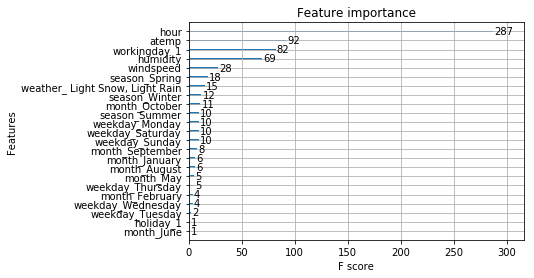

In [86]:
model = XGBRegressor()
model.fit(X, y)
xlf = XGBRegressor(objective="reg:linear", seed=6)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])

# plot feature importance
plot_importance(model)
plt.show()

In [83]:
XGResults = cross_val_score(model, X, y, cv=kfold)
print(XGResults.mean())

[20:54:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:54:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7718951462883145


In [545]:
model.feature_importances_

array([0.03881254, 0.03516148, 0.03430787, 0.06031831, 0.06272976,
       0.03520602, 0.03696798, 0.03189195, 0.05469542, 0.        ,
       0.03739713, 0.03472008, 0.03017539, 0.03203094, 0.03527758,
       0.02896569, 0.03155602, 0.03137442, 0.03142311, 0.02981126,
       0.03781365, 0.0438525 , 0.02938312, 0.0280071 , 0.03280002,
       0.02755546, 0.02901969, 0.02894006, 0.02980543], dtype=float32)

In [88]:
y3 = model.predict(X)
y3 = pd.DataFrame(y3)
rmse_y3 = np.sqrt(mean_squared_error(y ,y3))
print(rmse_y3)

76.22192037707534


In [89]:
y4 = xlf.predict(X)
y4 = pd.DataFrame(y4)
rmse_y4 = np.sqrt(mean_squared_error(y ,y4))
print(rmse_y4)

78.04646544709271


In [91]:
y_pred_actual = model.predict(actual_X_test)
y_pred_actual = pd.DataFrame(y_pred_actual)
y_pred_actual = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual))
print(y_pred_actual)

232.43504394816856


In [92]:
y_pred_actual2 = xlf.predict(actual_X_test)
y_pred_actual2 = pd.DataFrame(y_pred_actual2)
y_pred_actual2 = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual2))
print(y_pred_actual2)

232.05969532911982


In [94]:
print(np.sqrt(3754))

61.26989472816156


In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gdbr = GradientBoostingRegressor(n_estimators=100)
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [104]:
rmse_gdbr = np.sqrt(mean_squared_error(y_test ,y_gdbr))
print(rmse_gdbr)

80.29472891900376


In [219]:
print(len(X_train.columns))
print(X_train.columns)
print('Feature Importances:: ', np.round(gdbr.feature_importances_,3))
print('Feature Importances:: ', np.sort(np.round(gdbr.feature_importances_,3)))

29
Index(['atemp', 'humidity', 'windspeed', 'hour', 'season_Spring',
       'season_Summer', 'season_Winter', 'holiday_1', 'workingday_1',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')
Feature Importances::  [0.125 0.029 0.002 0.684 0.035 0.    0.01  0.    0.084 0.    0.018 0.
 0.001 0.003 0.002 0.    0.    0.    0.001 0.    0.    0.001 0.    0.
 0.001 0.    0.    0.001 0.002]
Feature Importances::  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.003 0.01  0.018
 0.029 0.035 0.084 0.125 0.684]


In [112]:
print("R-squared for Train: %.2f" %gdbr.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr.score(X_test, y_test))

R-squared for Train: 0.80
R-squared for Test: 0.78


In [148]:
%%time
#params = {'n_estimators'=np.arange(100,600,100), 'max_depth'=np.arange(1,10,1), 'learning_rate'=np.arange(.05,1,.05), 'min_samples_leaf'=np.arange(1,20,2), 'max_features'=np.arange(.1,1.2,.1)}
##params = {'n_estimators':np.arange(50,200,50), 'max_depth':np.arange(1,5,1), 'learning_rate':np.arange(.1,1,.1), 'min_samples_leaf':np.arange(1,16,2), 'max_features':np.arange(2,10,1)}
params = {'n_estimators':np.arange(50,200,50)}

gdbr_grid = GridSearchCV(gdbr, params, scoring='r2', cv=3, n_jobs=3)

Wall time: 0 ns


In [154]:
gdbr_GSCV = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
gdbr_GSCV.fit(X_train, y_train)
y_gdbr_GSCV = gdbr_GSCV.predict(X_test)
y_gdbr_GSCV = pd.DataFrame(y_gdbr_GSCV)


,0
0,19.412213
1,370.857984
2,30.435710
3,42.653994
4,198.048580


In [158]:
y_test.head()

4868      7
7212    731
1099     26
1318     47
4295    102
Name: Bookings, dtype: int64

In [160]:
y_gdbr_GSCV[0] = y_gdbr_GSCV[0].apply(lambda x: int(x))
y_gdbr_GSCV.head()

,0
0,19
1,370
2,30
3,42
4,198


In [161]:
rmse_gdbr = np.sqrt(mean_squared_error(y_test ,y_gdbr_GSCV))
print('rmse_gdbr ', rmse_gdbr)
print("R-squared for Train: %.2f" %gdbr_GSCV.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr_GSCV.score(X_test, y_test))

rmse_gdbr  80.3056479416745
R-squared for Train: 0.80
R-squared for Test: 0.78


In [143]:
print(gdbr_grid.estimator)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [139]:
gdbr_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([100, 200, 300, 400, 500]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='war

In [215]:
%%time
#gdbr_grid.fit(X_train,y_train)
#gdbr_test_pred = gdbr_grid.predict(X_test)

Wall time: 0 ns


rmse_gdbr  80.29472891900376
R-squared for Train: 0.80
R-squared for Test: 0.78


# Conclusions

##### The time and atime columns are highly correlated, so it is better to drop that column for better modelling.
##### The datetime column is divided into multiple columns, like date, day, weekday, month.
##### 

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [178]:
transF_pca_df_train = pca.fit_transform(X_train)
transF_pca_df_train = pd.DataFrame(transF_pca_df_train)
transF_pca_df_train.columns = ['PC1','PC2','PC3','PC4']
transF_pca_df_train.shape

(6872, 4)

In [181]:
print(np.round(pca.explained_variance_ratio_,3))
print(np.sum(pca.explained_variance_ratio_))

[0.681 0.136 0.104 0.074]
0.9955539869001548


In [184]:
pca1 = PCA(n_components=2)
pca1.fit(merged_Dummy)
pca_merged = pca1.fit_transform(merged_Dummy)
pca_merged = pd.DataFrame(pca_merged)
pca_merged.shape

(10769, 2)

In [185]:
print(np.round(pca1.explained_variance_ratio_,3))
print(np.sum(pca1.explained_variance_ratio_))

[0.982 0.012]
0.994397721550745


In [188]:
pca_train = pca_merged[:8591]
pca_test = pca_merged[8591:]

In [190]:
print(pca_train.shape)
print(pca_test.shape)
print(y.shape)

(8591, 2)
(2178, 2)
(8591,)


In [191]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_train, y, test_size=0.2, random_state=6)

In [192]:
GB_pca = GradientBoostingRegressor(n_estimators=100)

In [207]:
GB_pca.fit(X_train_pca, y_train_pca)
y_gb_pca_pred = GB_pca.predict(X_test_pca)
y_gb_pca_pred = pd.DataFrame(y_gb_pca_pred)
y_gb_pca_pred.head()

,0
0,6.760863
1,728.554763
2,25.710192
3,46.961481
4,100.074906


In [208]:
y_test_pca.head()

4868      7
7212    731
1099     26
1318     47
4295    102
Name: Bookings, dtype: int64

In [194]:
rmse_gd_PCA = np.sqrt(mean_squared_error(y_test_pca ,y_gb_pca_pred))
print(rmse_gd_PCA)

1.379926711241885


In [199]:
print("R-squared for Train: %.5f" %GB_pca.score(X_train_pca, y_train_pca))
print("R-squared for Test: %.5f" %GB_pca.score(X_test_pca, y_test_pca))

R-squared for Train: 0.99994
R-squared for Test: 0.99994


In [204]:
df_test_label.shape

(2178, 1)

In [200]:
actual_y_pca = GB_pca.predict(pca_test)
actual_y_pca = pd.DataFrame(actual_y_pca)

In [205]:
rmse_gd_PCA = np.sqrt(mean_squared_error(df_test_label ,actual_y_pca))
print(rmse_gd_PCA)

256.22506505951225


In [206]:
print("R-squared for Test: %.5f" %GB_pca.score(pca_test, df_test_label))

R-squared for Test: -1.04006


In [212]:
actual_y_pca.shape

(2178, 1)

In [211]:
df_test_label.shape

(2178, 1)

In [217]:
np.sum([2818,1568,1250])

5636